## Data: 
### Questions to be answered :
--> 1. Who was being polled and what was their party affiliation?

--> 2. Did the poll results favour Clinton or Trump?

--> 3. How did voter sentiment change over time?



## Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('dark_background')

In [2]:
import requests 
from io import StringIO

## Getting Data from URL 

In [3]:
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

In [4]:
# using requests to get the data in text-form
source = requests.get(url).text

In [5]:
poll_data = StringIO(source)

In [6]:
poll_df = pd.read_csv(poll_data)

In [7]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [8]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             1522 non-null   

## Missing Values

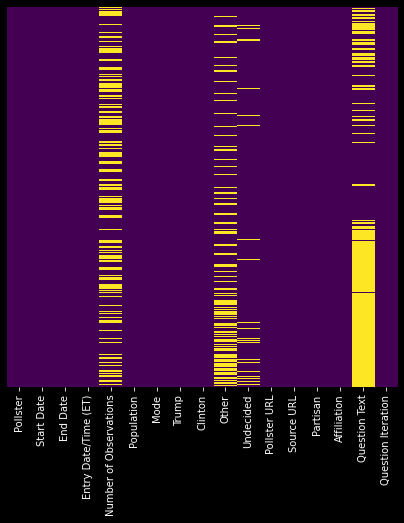

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(poll_df.isnull() ,yticklabels=False ,cbar=False ,cmap ='viridis')
plt.show()

## Question 1 --> Who was being polled and what was their party affiliation?

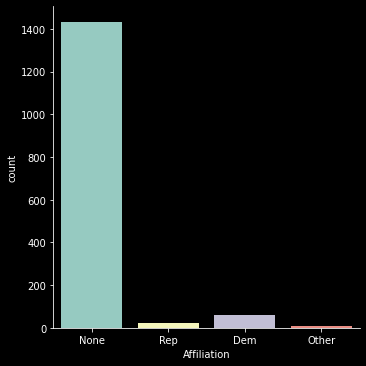

In [10]:
sns.catplot(x='Affiliation' ,data=poll_df ,kind='count')

In [11]:
poll_df.Affiliation.value_counts()

None     1434
Dem        59
Rep        21
Other       8
Name: Affiliation, dtype: int64

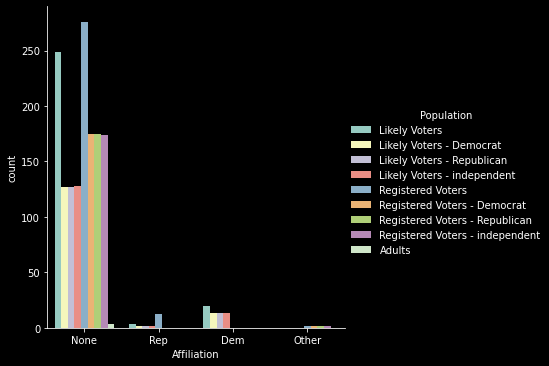

In [12]:
sns.catplot(x='Affiliation' ,data=poll_df ,hue='Population' ,kind='count')

In [13]:
poll_df.Mode.value_counts()

Internet             748
Live Phone           631
IVR/Online           128
Automated Phone       14
Live Phone/Online      1
Name: Mode, dtype: int64

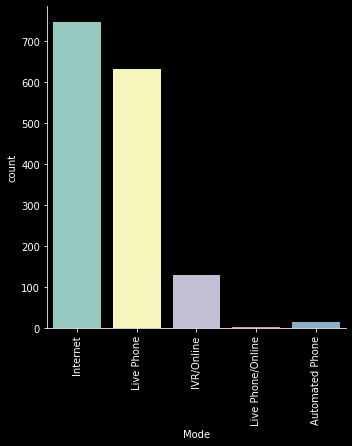

In [14]:
co = sns.catplot(x='Mode' , data=poll_df ,kind='count')
co.set_xticklabels(rotation=90)

## Question 2 --> Did the poll results favour Clinton or Trump?

In [15]:
poll_df.columns

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Trump', 'Clinton',
       'Other', 'Undecided', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation', 'Question Text', 'Question Iteration'],
      dtype='object')

In [16]:
avg = pd.DataFrame(poll_df.mean())

avg.drop(['Number of Observations', 'Question Iteration'] ,axis=0 ,inplace=True)

C:\Users\91959\AppData\Local\Temp/ipykernel_24276/2215385315.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = pd.DataFrame(poll_df.mean())


In [17]:
avg.head()

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [18]:
std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations', 'Question Iteration'], axis=0, inplace=True)
std.head()


C:\Users\91959\AppData\Local\Temp/ipykernel_24276/3606135073.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = pd.DataFrame(poll_df.std())


,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


<AxesSubplot:>

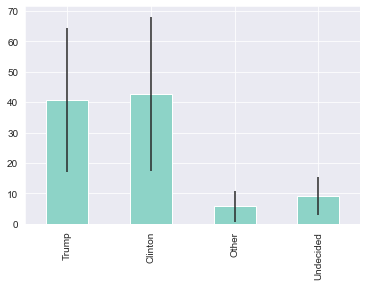

In [19]:
sns.set_style('darkgrid')
avg.plot(yerr=std , kind='bar' ,legend=False)

In [20]:
poll_avg = pd.concat([avg,std] ,axis=1)

In [21]:
poll_avg.columns = ['Average', 'Standard Deviation']
poll_avg


,Average,Standard Deviation
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


###  The race seems to be really close, with results in favour of Clinton with a higher standard deviation than for Trump.

## Question 3 --> How did voter sentiment change over time?

In [22]:
from datetime import datetime 

In [23]:
poll_df['Difference'] = (poll_df.Clinton - poll_df.Trump) / 100
poll_df.head()

# positive difference indicates a Clinton lead, and a negative difference indicates a Trump lead.


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


In [24]:
poll_df = poll_df.groupby(['Start Date'] ,as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,0.1425


<AxesSubplot:xlabel='Start Date'>

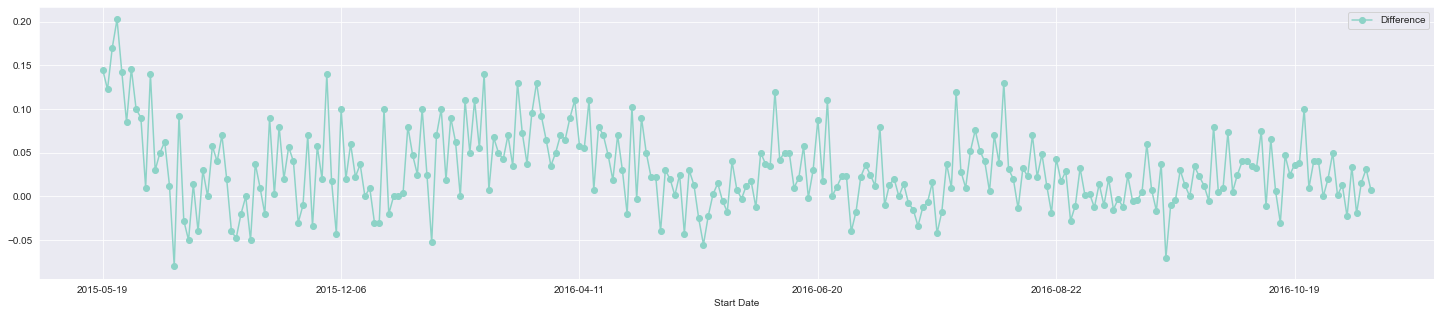

In [25]:
poll_df.plot('Start Date' ,'Difference' ,figsize=(25,5) ,marker='o' ,linestyle='-')

### The visualisation indicates that Trump has a slight lead in the polls, on average.